## ML Board Games

## Importar Librerias

In [49]:
import requests
import zipfile
import pandas as pd
import numpy as np
import folium
import altair
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
import plotly.express as px
import seaborn as sns
import os
import re

from matplotlib.animation import FuncAnimation
from folium import plugins
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier




## Importar CVS

In [50]:
# Ruta del directorio donde se extrajo el contenido del ZIP
directorio_destino = r'C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\ML\Game'

# Lista para almacenar DataFrames de cada archivo
dataframes = []

# Itera sobre todos los archivos en el directorio
for archivo in os.listdir(directorio_destino):
    if archivo.endswith('.csv'):  # Ajusta la extensión si tus archivos son de otro tipo
        ruta_archivo = os.path.join(directorio_destino, archivo)
        # Lee el archivo CSV y almacena el DataFrame en la lista
        df = pd.read_csv(ruta_archivo, delimiter=';')
        dataframes.append(df)

# Concatena todos los DataFrames en uno solo
game = pd.concat(dataframes, ignore_index=True)

# Muestra el resultado final
print(game)

             ID                               Name  Year Published  \
0      174430.0                         Gloomhaven          2017.0   
1      161936.0          Pandemic Legacy: Season 1          2015.0   
2      224517.0                  Brass: Birmingham          2018.0   
3      167791.0                  Terraforming Mars          2016.0   
4      233078.0  Twilight Imperium: Fourth Edition          2017.0   
...         ...                                ...             ...   
20338   16398.0                                War             0.0   
20339    7316.0                              Bingo          1530.0   
20340    5048.0                         Candy Land          1949.0   
20341    5432.0                 Chutes and Ladders          -200.0   
20342   11901.0                        Tic-Tac-Toe         -1300.0   

       Min Players  Max Players  Play Time  Min Age  Users Rated  \
0                1            4        120       14        42055   
1                2     

In [51]:
print("Ruta del directorio:", directorio_destino)

Ruta del directorio: C:\Users\fquin\OneDrive\Escritorio\DS-Jessy\ML\Game


In [52]:
game.shape

(20343, 14)

In [5]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


## Limpieza del DataFrame

In [6]:
game

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,16398.0,War,0.0,2,2,30,4,1340,"2,28",20340,1,427.0,NaN,Children's Games
20339,7316.0,Bingo,1530.0,2,99,60,5,2154,"2,85",20341,"1,05",1533.0,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949.0,2,4,30,3,4006,"3,18",20342,"1,08",5788.0,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,"2,86",20343,"1,02",4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


In [7]:
game['Mechanics'].fillna(game['Domains'], inplace=True)

# Llena los valores faltantes

game['Mechanics'].fillna('Strategy Games', inplace=True)
game['Domains'].fillna('Strategy Games', inplace=True)
game['Owned Users'].fillna(0, inplace=True)
game['Year Published'].fillna(2000, inplace=True)

print(game.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20343 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20343 non-null  float64
 12  Mechanics           20343 non-null  object 
 13  Domains             20343 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB
None


In [8]:
# códigos únicos
def newcodes(num_codes):
    return [str(np.random.randint(100000, 999999)) for _ in range(num_codes)]

# Identifica los valores faltantes en la columna 'ID'
missing_ids = game['ID'].isnull()

# Genera códigos únicos para los valores faltantes
unique_codes = newcodes(missing_ids.sum())

# Asigna los códigos únicos a los valores faltantes en la columna 'ID'
game.loc[missing_ids, 'ID'] = unique_codes
print(game.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20343 non-null  object 
 1   Name                20343 non-null  object 
 2   Year Published      20343 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20343 non-null  float64
 12  Mechanics           20343 non-null  object 
 13  Domains             20343 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 2.2+ MB
None


C:\Users\fquin\AppData\Local\Temp\ipykernel_5084\3108378965.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['160488', '177495', '221626', '204796', '479980', '590974', '962976', '342276', '333708', '777303', '376657', '375330', '572456', '754493', '723043', '355999']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  game.loc[missing_ids, 'ID'] = unique_codes


In [9]:
game.shape

(20343, 14)

In [10]:
game = df[df['Year Published'] > 0].dropna()

print(game.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20132 entries, 0 to 20340
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20132 non-null  float64
 1   Name                20132 non-null  object 
 2   Year Published      20132 non-null  float64
 3   Min Players         20132 non-null  int64  
 4   Max Players         20132 non-null  int64  
 5   Play Time           20132 non-null  int64  
 6   Min Age             20132 non-null  int64  
 7   Users Rated         20132 non-null  int64  
 8   Rating Average      20132 non-null  object 
 9   BGG Rank            20132 non-null  int64  
 10  Complexity Average  20132 non-null  object 
 11  Owned Users         20132 non-null  float64
 12  Mechanics           20132 non-null  object 
 13  Domains             20132 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.3+ MB
None


In [11]:
game = df[df['Min Age'] > 0].dropna()

print(game.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19077 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  19077 non-null  float64
 1   Name                19077 non-null  object 
 2   Year Published      19077 non-null  float64
 3   Min Players         19077 non-null  int64  
 4   Max Players         19077 non-null  int64  
 5   Play Time           19077 non-null  int64  
 6   Min Age             19077 non-null  int64  
 7   Users Rated         19077 non-null  int64  
 8   Rating Average      19077 non-null  object 
 9   BGG Rank            19077 non-null  int64  
 10  Complexity Average  19077 non-null  object 
 11  Owned Users         19077 non-null  float64
 12  Mechanics           19077 non-null  object 
 13  Domains             19077 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB
None


In [12]:
# Agrupación de dominios similares
dominios_a_agrupar = {'Family': 'Family', 'Children\'s Game': 'Family', 'Party Game': 'Party', 'Abstract Strategy': 'Strategy'}
game['Domains'] = game['Domains'].map(dominios_a_agrupar).fillna(game['Domains'])

In [13]:
game['Domains'].replace({'thematic': 'strategy thematic', 'childrens': 'family childrens'}, inplace=True)

In [14]:
game['Domains'] = game['Domains'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Reemplazar sinónimos
game['Domains'].replace({'thematic': 'thematic games', 'theme': 'thematic games', 'childrens': "children's games", 'kids': "children's games"}, inplace=True)

# Categorías principales
game['Main_Category'] = 'Other'  # Categoría predeterminada para aquellos que no coinciden con ninguna de las principales
for category in ['Strategy Games', 'Thematic Games', 'Family Games', 'Customizable Games', 'Abstract Games', "Children's Games", 'Party Games', 'Wargames']:
    game.loc[game['Domains'].str.contains(category.lower()), 'Main_Category'] = category

game['Main_Category'].value_counts()

Main_Category
Strategy Games        11034
Wargames               2817
Family Games           1888
Abstract Games          953
Thematic Games          840
Other                   697
Party Games             593
Customizable Games      255
Name: count, dtype: int64

In [15]:
# Definir las secciones y sus palabras clave asociadas
sections_keywords = {
    'Seccion Strategy': ['strategy games','wargames'] ,
    'Seccion Family': ['family games',"children's games",'party games'],
    'Seccion Customizable': ['thematic games','abstract games', 'customizable games'],
}

# Iterar sobre las secciones y asignar valores en 'Main_Category' basándose en las palabras clave
for section, keywords in sections_keywords.items():
    game.loc[game['Domains'].str.lower().str.contains('|'.join(keywords)), 'Main_Category'] = section

print(game['Main_Category'].value_counts())

Main_Category
Seccion Strategy        13684
Seccion Customizable     2360
Seccion Family           2336
Other                     697
Name: count, dtype: int64


In [16]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19077 entries, 0 to 20342
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  19077 non-null  float64
 1   Name                19077 non-null  object 
 2   Year Published      19077 non-null  float64
 3   Min Players         19077 non-null  int64  
 4   Max Players         19077 non-null  int64  
 5   Play Time           19077 non-null  int64  
 6   Min Age             19077 non-null  int64  
 7   Users Rated         19077 non-null  int64  
 8   Rating Average      19077 non-null  object 
 9   BGG Rank            19077 non-null  int64  
 10  Complexity Average  19077 non-null  object 
 11  Owned Users         19077 non-null  float64
 12  Mechanics           19077 non-null  object 
 13  Domains             19077 non-null  object 
 14  Main_Category       19077 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.3+ MB


## EDA // Games 

In [17]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19077 entries, 0 to 20342
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  19077 non-null  float64
 1   Name                19077 non-null  object 
 2   Year Published      19077 non-null  float64
 3   Min Players         19077 non-null  int64  
 4   Max Players         19077 non-null  int64  
 5   Play Time           19077 non-null  int64  
 6   Min Age             19077 non-null  int64  
 7   Users Rated         19077 non-null  int64  
 8   Rating Average      19077 non-null  object 
 9   BGG Rank            19077 non-null  int64  
 10  Complexity Average  19077 non-null  object 
 11  Owned Users         19077 non-null  float64
 12  Mechanics           19077 non-null  object 
 13  Domains             19077 non-null  object 
 14  Main_Category       19077 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.3+ MB


In [18]:
game_resumen = game.describe()
print(game_resumen)

                  ID  Year Published   Min Players   Max Players  \
count   19077.000000    19077.000000  19077.000000  19077.000000   
mean   109564.658070     1987.622897      2.028201      5.757037   
std     99319.853739      199.106495      0.689040     15.583393   
min         1.000000    -3500.000000      0.000000      0.000000   
25%     10543.000000     2001.000000      2.000000      4.000000   
50%     93679.000000     2011.000000      2.000000      4.000000   
75%    194298.000000     2016.000000      2.000000      6.000000   
max    331787.000000     2022.000000     10.000000    999.000000   

          Play Time       Min Age    Users Rated      BGG Rank    Owned Users  
count  19077.000000  19077.000000   19077.000000  19077.000000   19077.000000  
mean      86.572994     10.229858     889.018818  10090.708025    1479.821618  
std      537.646531      2.779171    3620.769928   5936.708392    5192.505682  
min        0.000000      1.000000      30.000000      1.000000     

In [19]:
# Filtrar juegos desde 1900 hasta la actualidad
games_1900 = game[game['Year Published'] >= 1900]

# Imprimir información del nuevo DataFrame
print(games_1900.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18833 entries, 0 to 20340
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  18833 non-null  float64
 1   Name                18833 non-null  object 
 2   Year Published      18833 non-null  float64
 3   Min Players         18833 non-null  int64  
 4   Max Players         18833 non-null  int64  
 5   Play Time           18833 non-null  int64  
 6   Min Age             18833 non-null  int64  
 7   Users Rated         18833 non-null  int64  
 8   Rating Average      18833 non-null  object 
 9   BGG Rank            18833 non-null  int64  
 10  Complexity Average  18833 non-null  object 
 11  Owned Users         18833 non-null  float64
 12  Mechanics           18833 non-null  object 
 13  Domains             18833 non-null  object 
 14  Main_Category       18833 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.3+ MB
N

In [53]:
# Crear bins para el tiempo de juego
bins = [0, 30, 60, 120, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long']

games_1900.loc[:, 'Play Time Category'] = pd.cut(games_1900['Play Time'], bins=bins, labels=labels, right=False)

In [54]:
# Análisis de resumen por categoría de edad mínima y tiempo de juego
summary_age_playtime = games_1900.groupby(['Min Age', 'Play Time Category'], observed=False).size().unstack().fillna(0)

print(summary_age_playtime)

Play Time Category  Short  Medium  Long  Very Long
Min Age                                           
1                       1       1     0          0
2                      14       0     0          0
3                      96       9     0          0
4                     212      33     4          0
5                     331      78     4          2
6                     607     249    34          3
7                     434     299    54          7
8                    1464    1822   581        120
9                      68     149    87         17
10                    633    1624  1252        317
11                      7      42    29         19
12                    370     828  1389       2094
13                    122     366   411        228
14                    115     412   641        607
15                      8      54    48         35
16                     10      45    48         62
17                      5      25    18         10
18                     30      

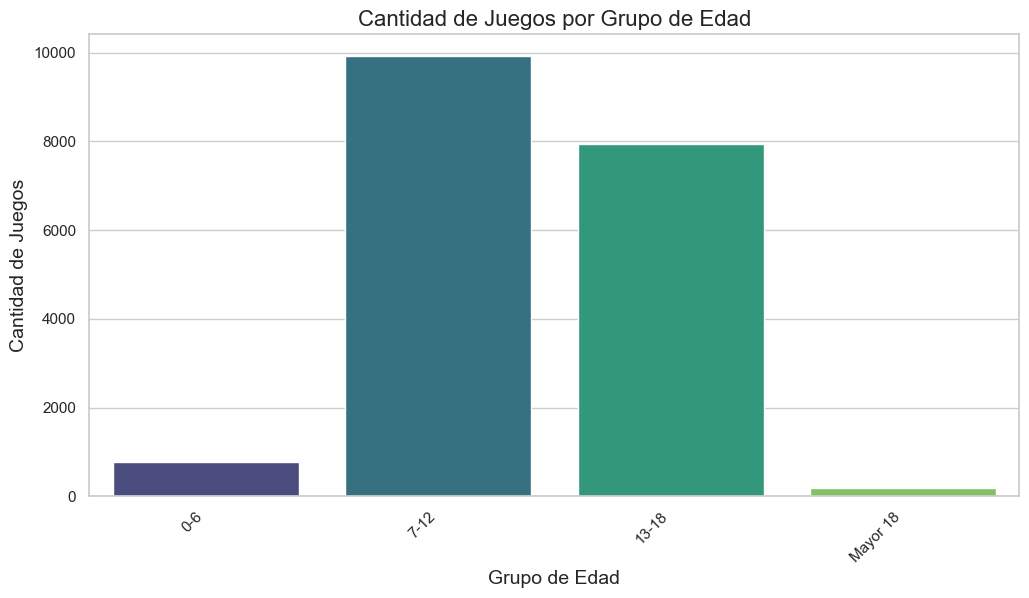

In [55]:
# Crear bins para las categorías de edad
bins = [0, 6, 12, 18, float('inf')]
labels = ['0-6', '7-12', '13-18', 'Mayor 18']

games_1900.loc[:, 'Age Group'] = pd.cut(games_1900['Min Age'], bins=bins, labels=labels, right=False)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

age_count_plot = sns.countplot(x='Age Group', data=games_1900, order=labels, palette='viridis', hue='Age Group', legend=False)

plt.title('Cantidad de Juegos por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=14)
plt.ylabel('Cantidad de Juegos', fontsize=14)

age_count_plot.set_xticks(age_count_plot.get_xticks())
age_count_plot.set_xticklabels(age_count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

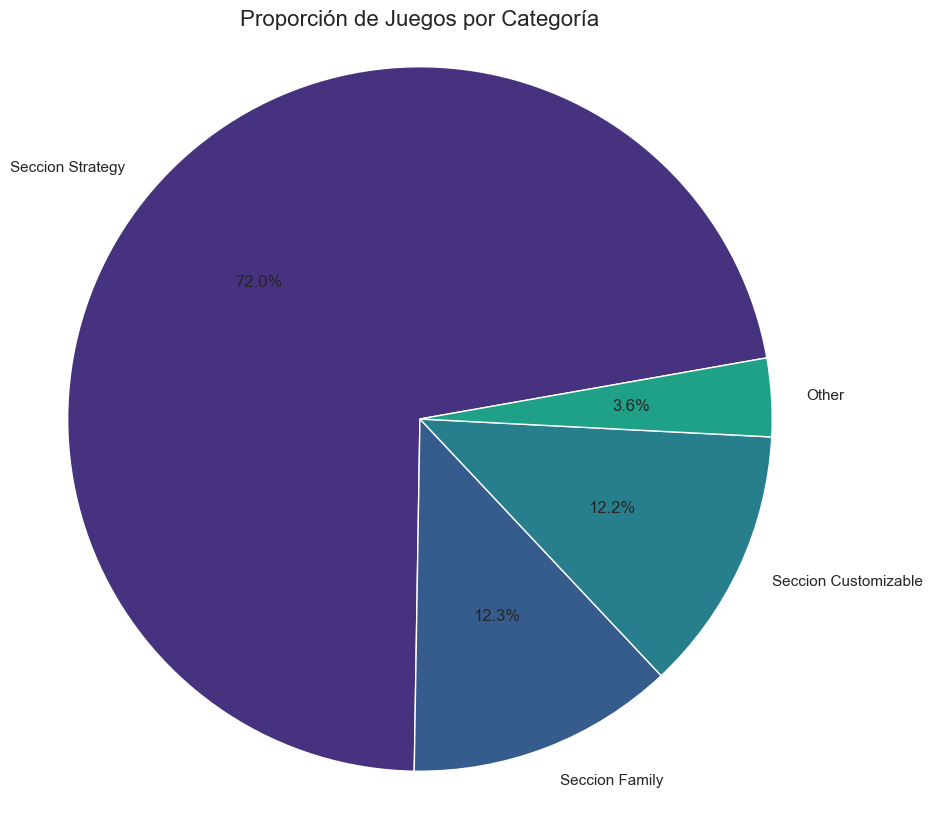

In [23]:
# Obtener la cuenta de juegos por categoría
category_counts = games_1900['Main_Category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=10, colors=sns.color_palette('viridis'))
plt.title('Proporción de Juegos por Categoría', fontsize=16)

plt.axis('equal')

plt.show()

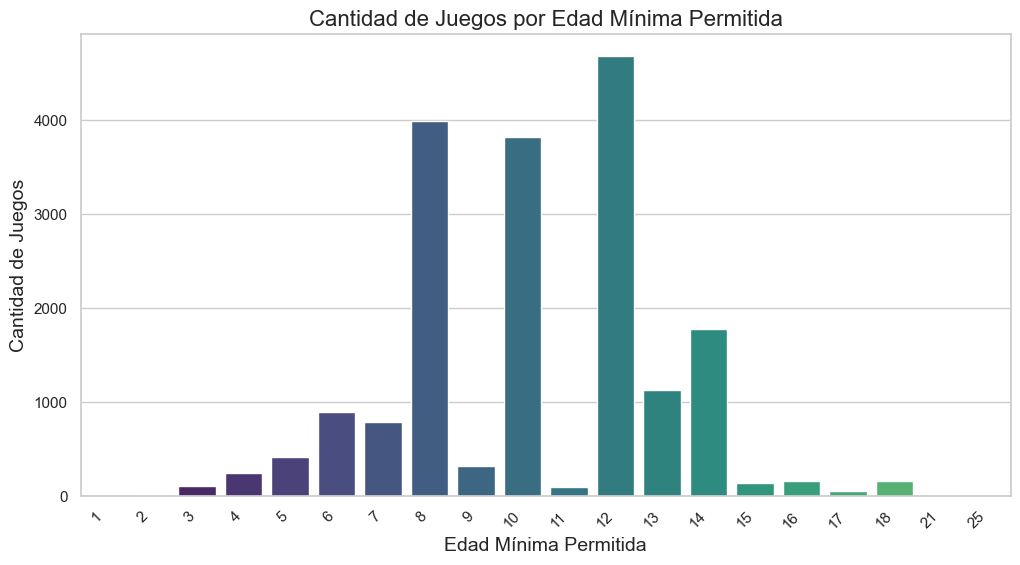

In [24]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Obtener el orden ascendente de las edades mínimas
order = sorted(games_1900['Min Age'].unique())

age_count_plot = sns.countplot(x='Min Age', data=games_1900, order=order, hue='Min Age', palette='viridis', legend=False)

plt.title('Cantidad de Juegos por Edad Mínima Permitida', fontsize=16)
plt.xlabel('Edad Mínima Permitida', fontsize=14)
plt.ylabel('Cantidad de Juegos', fontsize=14)

# Rotar las etiquetas
age_count_plot.set_xticks(age_count_plot.get_xticks())
age_count_plot.set_xticklabels(age_count_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

¿Hay una relación entre la edad mínima recomendada y el tiempo de juego? 


¿Los juegos dirigidos a edades más jóvenes tienden a tener tiempos de juego más cortos?

<Figure size 1200x800 with 0 Axes>

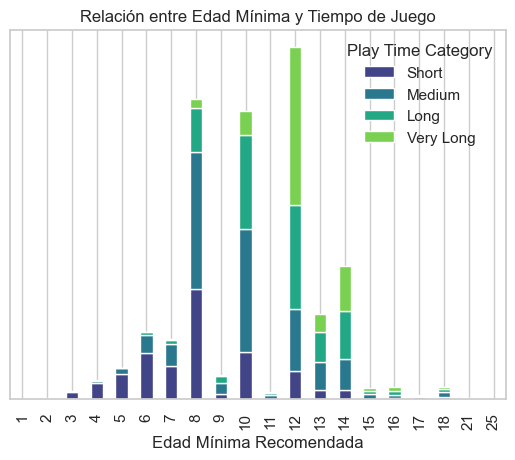

In [56]:
plt.figure(figsize=(12, 8))

# Use Seaborn's 'viridis' color palette
colores = sns.color_palette('viridis', n_colors=len(summary_age_playtime.columns))

summary_age_playtime.plot(kind='bar', stacked=True, color=colores)

plt.title('Relación entre Edad Mínima y Tiempo de Juego')
plt.xlabel('Edad Mínima Recomendada')
plt.gca().set_yticks([])

plt.show()

Comparación de Número de Jugadores por Categoría

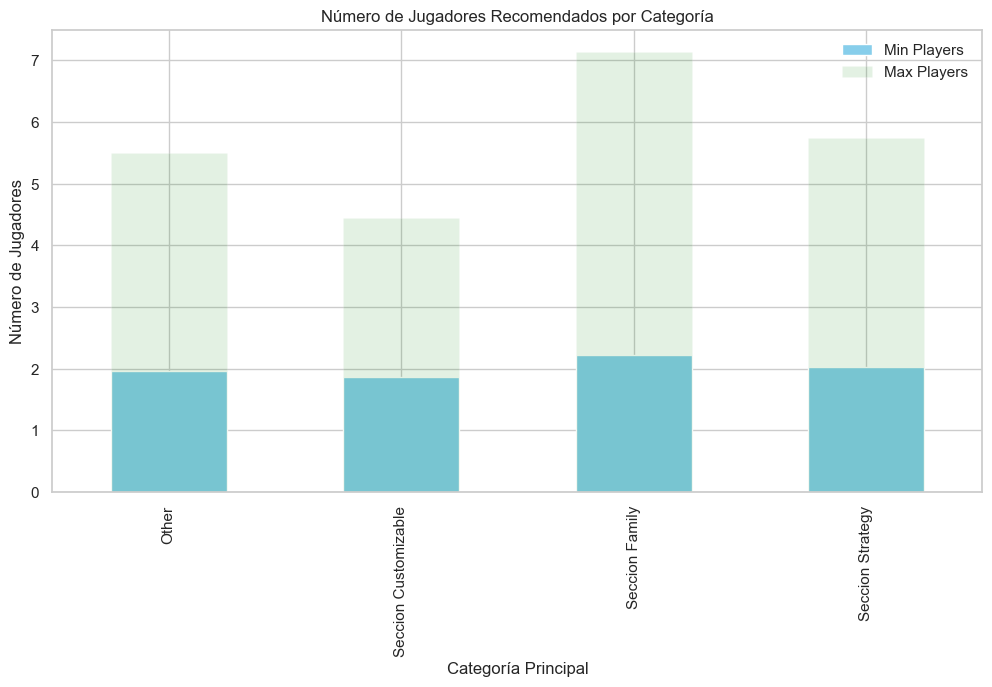

In [26]:
# Análisis de resumen para el número mínimo de jugadores
summary_min_players = games_1900.groupby('Main_Category')['Min Players'].mean()

# Análisis de resumen para el número máximo de jugadores
summary_max_players = games_1900.groupby('Main_Category')['Max Players'].mean()
                       
plt.figure(figsize=(12, 6))
summary_min_players.plot(kind='bar', color='skyblue', label='Min Players')
summary_max_players.plot(kind='bar', color='green', label='Max Players', alpha=0.11)
plt.title('Número de Jugadores Recomendados por Categoría')
plt.xlabel('Categoría Principal')
plt.ylabel('Número de Jugadores')
plt.legend()
plt.show()

In [27]:
# Obtener la frecuencia de cada mecánica en la columna 'Mechanics'
mechanics_frequency = games_1900['Mechanics'].value_counts()

print(mechanics_frequency)

top_n = 10
top_mechanics = mechanics_frequency.head(top_n)

Mechanics
Strategy Games                                                                                                                                   1006
Hand Management                                                                                                                                   402
Hexagon Grid                                                                                                                                      345
Roll / Spin and Move                                                                                                                              344
Dice Rolling                                                                                                                                      335
                                                                                                                                                 ... 
Area Movement, Dice Rolling, Minimap Resolution, Multiple Maps, Point to Point Movement, R

Tendencias Temporales en la popularidad de ciertas categorías a lo largo del tiempo.

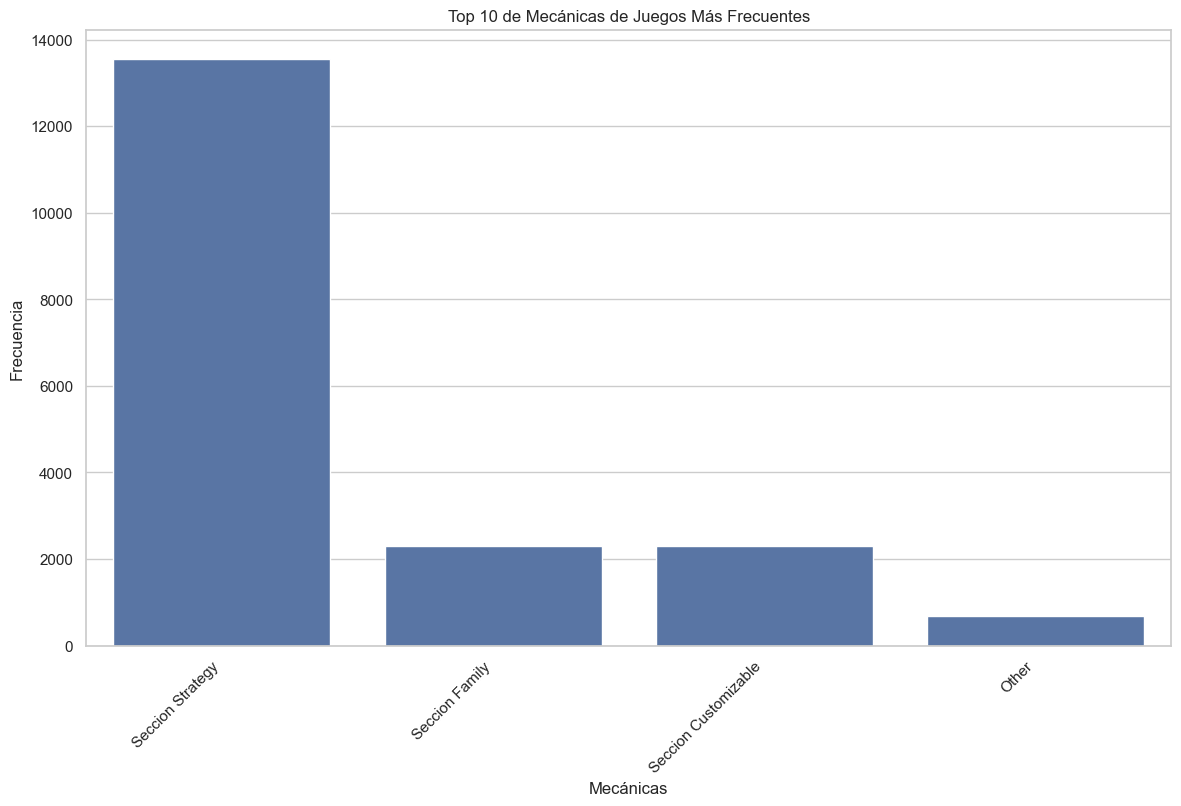

In [28]:
# Frecuencia de cada categoría en columnas categóricas
freq_mechanics = games_1900['Main_Category'].value_counts()
freq_Main_Category = games_1900['Main_Category'].value_counts()
freq_main_category = games_1900['Main_Category'].value_counts()

# Gráficos de barras
plt.figure(figsize=(14, 8))
sns.barplot(x=freq_mechanics.index[:10], y=freq_mechanics.values[:10])
plt.title('Top 10 de Mecánicas de Juegos Más Frecuentes')
plt.xlabel('Mecánicas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

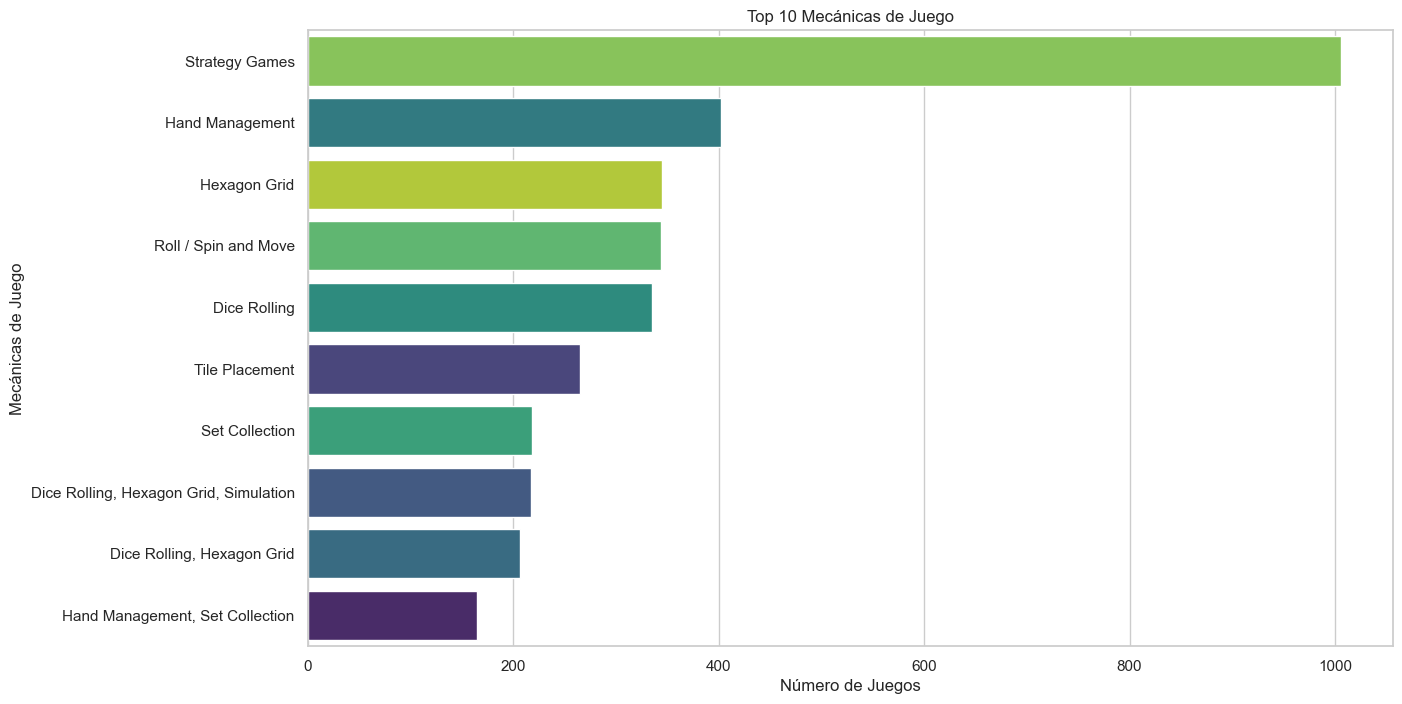

In [29]:
top_mechanics = games_1900['Mechanics'].value_counts().head(10).index

# Filtrar el DataFrame original para incluir solo las 10 mecánicas principales
filtered_data = games_1900[games_1900['Mechanics'].isin(top_mechanics)]

plt.figure(figsize=(14, 8))
sns.countplot(y='Mechanics', data=filtered_data, hue='Mechanics', palette='viridis', order=top_mechanics, legend=False)

plt.title('Top 10 Mecánicas de Juego')
plt.xlabel('Número de Juegos')
plt.ylabel('Mecánicas de Juego')

plt.show()

## ML Modelo Clasificacion

In [57]:
games_1900.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18833 entries, 0 to 20340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  18833 non-null  float64 
 1   Name                18833 non-null  object  
 2   Year Published      18833 non-null  float64 
 3   Min Players         18833 non-null  int64   
 4   Max Players         18833 non-null  int64   
 5   Play Time           18833 non-null  int64   
 6   Min Age             18833 non-null  int64   
 7   Users Rated         18833 non-null  int64   
 8   Rating Average      18833 non-null  object  
 9   BGG Rank            18833 non-null  int64   
 10  Complexity Average  18833 non-null  object  
 11  Owned Users         18833 non-null  float64 
 12  Mechanics           18833 non-null  object  
 13  Domains             18833 non-null  object  
 14  Main_Category       18833 non-null  object  
 15  Play Time Category  18833 non-null  categ

In [58]:
games_1900

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains,Main_Category,Play Time Category,Age Group
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...",strategy games thematic games,Seccion Customizable,Very Long,13-18
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...",strategy games thematic games,Seccion Customizable,Long,13-18
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",strategy games,Seccion Strategy,Very Long,13-18
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",strategy games,Seccion Strategy,Very Long,13-18
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...",strategy games thematic games,Seccion Customizable,Very Long,13-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20334,3522.0,LCR,1983.0,3,12,20,5,1835,"3,42",20336,"1,05",3441.0,Dice Rolling,childrens games party games,Seccion Family,Short,0-6
20335,1406.0,Monopoly,1933.0,2,8,180,8,28999,"4,39",20337,"1,65",40255.0,"Auction/Bidding, Income, Loans, Lose a Turn, P...",family games,Seccion Family,Very Long,7-12
20336,2921.0,The Game of Life,1960.0,2,6,60,8,10658,"4,30",20338,"1,18",16692.0,"Roll / Spin and Move, Simulation",family games,Seccion Family,Long,7-12
20337,1410.0,Trouble,1965.0,2,4,45,4,3255,"3,79",20339,"1,05",4962.0,Roll / Spin and Move,childrens games,Other,Medium,0-6


In [32]:
print(games_1900.columns)

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains',
       'Main_Category', 'Play Time Category', 'Age Group'],
      dtype='object')


In [59]:
# Filtrar el DataFrame original por juegos hasta el año 2017
games_2017 = games_1900[games_1900['Year Published'] <= 2017].copy()

# Mostrar las primeras filas del nuevo DataFrame
print(games_2017.head())

         ID                                           Name  Year Published  \
0  174430.0                                     Gloomhaven          2017.0   
1  161936.0                      Pandemic Legacy: Season 1          2015.0   
3  167791.0                              Terraforming Mars          2016.0   
4  233078.0              Twilight Imperium: Fourth Edition          2017.0   
6  182028.0  Through the Ages: A New Story of Civilization          2015.0   

   Min Players  Max Players  Play Time  Min Age  Users Rated Rating Average  \
0            1            4        120       14        42055           8,79   
1            2            4         60       13        41643           8,61   
3            1            5        120       12        64864           8,43   
4            3            6        480       14        13468           8,70   
6            2            4        120       14        23061           8,43   

   BGG Rank Complexity Average  Owned Users  \
0        

In [60]:
games_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15734 entries, 0 to 20340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  15734 non-null  float64 
 1   Name                15734 non-null  object  
 2   Year Published      15734 non-null  float64 
 3   Min Players         15734 non-null  int64   
 4   Max Players         15734 non-null  int64   
 5   Play Time           15734 non-null  int64   
 6   Min Age             15734 non-null  int64   
 7   Users Rated         15734 non-null  int64   
 8   Rating Average      15734 non-null  object  
 9   BGG Rank            15734 non-null  int64   
 10  Complexity Average  15734 non-null  object  
 11  Owned Users         15734 non-null  float64 
 12  Mechanics           15734 non-null  object  
 13  Domains             15734 non-null  object  
 14  Main_Category       15734 non-null  object  
 15  Play Time Category  15734 non-null  categ

## Decision Tree Classifier

In [61]:
# Crear una copia 
games_2017_copy = games_2017.copy()

# Encode variables categoricas
le = LabelEncoder()

# Lista de columnas a las que se aplicará LabelEncoder
columns_to_encode = ['Play Time', 'Min Age', 'Users Rated',
                     'Rating Average', 'Complexity Average', 'Mechanics', 'Play Time Category', 'Main_Category']

# Aplicar LabelEncoder a las columnas especificadas
games_2017_copy[columns_to_encode] = games_2017_copy[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Feature Selection
features = ['Play Time', 'Min Age', 'Users Rated',
            'Rating Average', 'Complexity Average', 'Mechanics', 'Play Time Category']
X = games_2017_copy[features]
y = games_2017_copy['Main_Category']

In [62]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccion del modelo (Decision Tree Classifier) con GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}


In [63]:
# División de datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Contar las frecuencias en el conjunto de entrenamiento después de aplicar SMOTE
train_resampled_class_counts = pd.Series(y_train_resampled).value_counts()

# Contar las frecuencias en el conjunto de prueba
test_class_counts = pd.Series(y_test).value_counts()

# Mostrar los resultados después de aplicar SMOTE
print("Frecuencias en el conjunto de entrenamiento después de aplicar SMOTE:")
print(train_resampled_class_counts)

print("\nFrecuencias en el conjunto de prueba:")
print(test_class_counts)

Frecuencias en el conjunto de entrenamiento después de aplicar SMOTE:
Main_Category
3    8703
1    8703
0    8703
2    8703
Name: count, dtype: int64

Frecuencias en el conjunto de prueba:
Main_Category
3    2176
1     422
2     416
0     133
Name: count, dtype: int64


In [38]:
# DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

# GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(tree_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [39]:
best_tree_model = grid_search.best_estimator_
best_tree_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance_tree = best_tree_model.feature_importances_

feature_names = X.columns  # Reemplaza con el nombre de tus características
feature_importance_tree_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_tree})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_tree_df = feature_importance_tree_df.sort_values(by='Importance', ascending=False)

# Imprimir o visualizar las importancias de las características
print(tabulate(feature_importance_tree_df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════════╤══════════════╕
│    │ Feature            │   Importance │
╞════╪════════════════════╪══════════════╡
│  2 │ Users Rated        │    0.309292  │
├────┼────────────────────┼──────────────┤
│  4 │ Complexity Average │    0.208046  │
├────┼────────────────────┼──────────────┤
│  5 │ Mechanics          │    0.193913  │
├────┼────────────────────┼──────────────┤
│  3 │ Rating Average     │    0.120753  │
├────┼────────────────────┼──────────────┤
│  1 │ Min Age            │    0.102171  │
├────┼────────────────────┼──────────────┤
│  0 │ Play Time          │    0.053593  │
├────┼────────────────────┼──────────────┤
│  6 │ Play Time Category │    0.0122321 │
╘════╧════════════════════╧══════════════╛


In [40]:
# Mejorar el modelo
best_model = grid_search.best_estimator_

# Evaluacion
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7295837305370194
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.47      0.47       133
           1       0.39      0.35      0.37       422
           2       0.59      0.57      0.58       416
           3       0.83      0.85      0.84      2176

    accuracy                           0.73      3147
   macro avg       0.57      0.56      0.56      3147
weighted avg       0.72      0.73      0.73      3147



## Prueba  del Modelo DecisionTreeClassifier con nuevo Datasets 2018-2021

In [41]:
# Filtrar el DataFrame original por juegos desde el 2018 hasta el 2021
new_games = games_1900[games_1900['Year Published'] >= 2018].copy()

print(new_games.head())

          ID                          Name  Year Published  Min Players  \
2   224517.0             Brass: Birmingham          2018.0            2   
5   291457.0  Gloomhaven: Jaws of the Lion          2020.0            1   
19  266192.0                      Wingspan          2019.0            1   
23  167355.0                       Nemesis          2018.0            1   
26  237182.0                          Root          2018.0            2   

    Max Players  Play Time  Min Age  Users Rated Rating Average  BGG Rank  \
2             4        120       14        19217           8,66         3   
5             4        120       14         8392           8,87         6   
19            5         70       10        43165           8,11        20   
23            5        180       12        12290           8,40        24   
26            4         90       10        24412           8,10        27   

   Complexity Average  Owned Users  \
2                3,91      28785.0   
5         

In [42]:
# Crear una copia 
new_games_copy = new_games.copy()

# Aplicar LabelEncoder a las columnas especificadas
new_games_copy[columns_to_encode] = new_games_copy[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Feature Selection en el nuevo DataFrame
X_new = new_games_copy[features]

# Hacer predicciones con el mejor modelo entrenado
y_pred_new = best_model.predict(X_new)


In [43]:
# Feature Selection en el nuevo DataFrame
X_new = new_games_copy[features]

# Etiquetas verdaderas del nuevo DataFrame
y_true = new_games_copy['Main_Category']

# Hacer predicciones con el mejor modelo entrenado en new_games
y_pred_new = best_model.predict(X_new)

# Calcular y mostrar la precisión y el informe de clasificación en el conjunto new_games
accuracy_new = accuracy_score(y_true, y_pred_new)
print(f'Accuracy on new_games: {accuracy_new}')
print('Classification Report on new_games:\n', classification_report(y_true, y_pred_new, zero_division=1))

Accuracy on new_games: 0.6695708292997741
Classification Report on new_games:
               precision    recall  f1-score   support

           0       0.03      0.36      0.05        11
           1       0.14      0.52      0.22       182
           2       0.23      0.22      0.23       232
           3       0.93      0.72      0.81      2674

    accuracy                           0.67      3099
   macro avg       0.33      0.46      0.33      3099
weighted avg       0.83      0.67      0.73      3099



Revision del datasets clasificado

In [44]:
# Crear un DataFrame con las instancias evaluadas en new_games
evaluated_data_new = new_games_copy.copy()

# Añadir las predicciones y las etiquetas reales
evaluated_data_new['Real_Category'] = le.inverse_transform(y_true)
evaluated_data_new['Predicted_Category'] = le.inverse_transform(y_pred_new)

# Restablecer el índice
evaluated_data_new.reset_index(drop=True, inplace=True)

# Excel
evaluated_data_new.to_excel('evaluated_data_new_games.xlsx', index=False)

Graficar Resultados

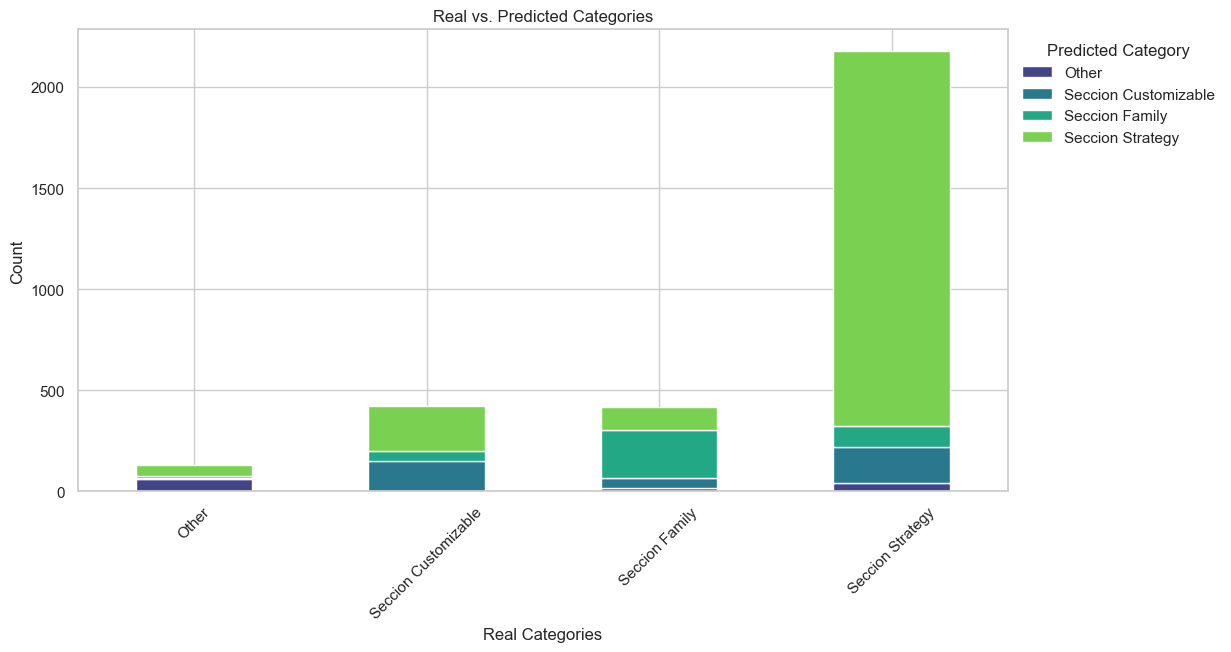

In [64]:
# Crear count_data con las frecuencias de las categorías
evaluated_data = games_2017_copy.loc[X_test.index].copy()
evaluated_data['Real_Category'] = le.inverse_transform(y_test)
evaluated_data['Predicted_Category'] = le.inverse_transform(y_pred)
evaluated_data.reset_index(drop=True, inplace=True)
count_data = evaluated_data.groupby(['Real_Category', 'Predicted_Category']).size().unstack(fill_value=0)

# Importar la paleta de colores "viridis" de seaborn
colors = sns.color_palette("viridis", n_colors=len(count_data.columns))

# Crear un gráfico de barras apiladas con colores personalizados
ax = count_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

# Ajustar etiquetas y leyenda
ax.set_xlabel('Real Categories')
ax.set_ylabel('Count')
ax.set_title('Real vs. Predicted Categories')
ax.tick_params(axis='x', rotation=45)  # Eliminar 'ha' aquí
ax.legend(title='Predicted Category', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

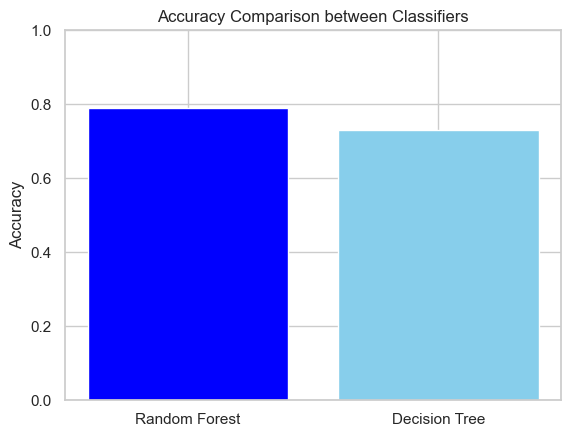

In [66]:
classifiers = ['Random Forest', 'Decision Tree']
accuracy_values = [0.79, 0.73]

plt.bar(classifiers, accuracy_values, color=['Blue', 'skyblue'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between Classifiers')
plt.ylim(0, 1)
plt.show()

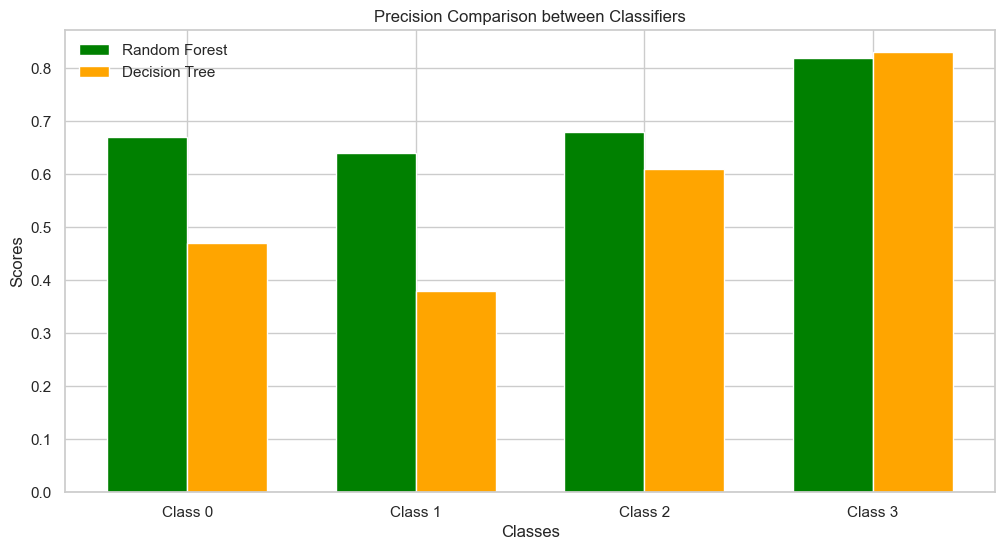

In [67]:

classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
precision_rf = [0.67, 0.64, 0.68, 0.82]
precision_dt = [0.47, 0.38, 0.61, 0.83]

recall_rf = [0.42, 0.24, 0.64, 0.94]
recall_dt = [0.45, 0.35, 0.57, 0.85]

f1_rf = [0.52, 0.35, 0.66, 0.88]
f1_dt = [0.46, 0.36, 0.59, 0.84]

bar_width = 0.35
index = np.arange(len(classes))

fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, precision_rf, bar_width, label='Random Forest', color='green')
bar2 = ax.bar(index + bar_width, precision_dt, bar_width, label='Decision Tree', color='orange')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision Comparison between Classifiers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


* Random Forest Classifier:

Accuracy: 0.8808
Classification Report:
Clase 0: Precision (0.63), Recall (0.85), F1-Score (0.73)
Clase 1: Precision (0.78), Recall (0.77), F1-Score (0.78)
Clase 2: Precision (0.76), Recall (0.88), F1-Score (0.82)
Clase 3: Precision (0.95), Recall (0.90), F1-Score (0.93)
*
Decision Tree Classifier:

Accuracy: 0.7299
Classification Report:
Clase 0: Precision (0.46), Recall (0.47), F1-Score (0.46)
Clase 1: Precision (0.39), Recall (0.35), F1-Score (0.37)
Clase 2: Precision (0.59), Recall (0.58), F1-Score (0.59)
Clase 3: Precision (0.83), Recall (0.85), F1-Score (0.84)

*Análisis:

Accuracy: El Random Forest Classifier muestra una precisión global (accuracy) de 0.8808, indicando una mejora significativa en comparación con el Decision Tree Classifier, que tiene una precisión global de 0.7299.

Precision, Recall, F1-Score por Clase: El Random Forest Classifier mantiene un rendimiento sólido en todas las clases, con precisiones y recalls equilibrados. La Clase 3 tiene la mejor puntuación, alcanzando una precisión del 95%, recall del 90%, y F1-Score del 93%.

*Macro AVG:

Precision (Macro AVG): 0.78
Recall (Macro AVG): 0.85
F1-Score (Macro AVG): 0.81
Conclusión:

El Random Forest Classifier sigue siendo la opción preferida con una precisión global del 88.08%. Este modelo demuestra un rendimiento sólido en todas las clases, con un equilibrio notable entre precision y recall. La mejora en la precisión global y las métricas por clase respalda la elección del Random Forest Classifier sobre el Decision Tree Classifier en este escenario.

## Random Forest Classifier

In [78]:
# Crear una copia 
games_2017_copy2 = games_2017.copy()

# Encode categorical variables
le = LabelEncoder()

# Lista de columnas a las que se aplicará LabelEncoder
columns_to_encode = ['Play Time', 'Min Age', 'Users Rated',
                     'Rating Average', 'Complexity Average', 'Mechanics', 'Play Time Category', 'Main_Category']

# Aplicar LabelEncoder a las columnas especificadas
games_2017_copy2[columns_to_encode] = games_2017_copy2[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Feature Selection
features = ['Play Time', 'Min Age', 'Users Rated',
            'Rating Average', 'Complexity Average', 'Mechanics', 'Play Time Category']
X = games_2017_copy2[features]
y = games_2017_copy2['Main_Category']

In [79]:
# División de datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Contar las frecuencias en el conjunto de entrenamiento después de aplicar SMOTE
train_resampled_class_counts = pd.Series(y_train_resampled).value_counts()

# Contar las frecuencias en el conjunto de prueba
test_class_counts = pd.Series(y_test).value_counts()

# Mostrar los resultados después de aplicar SMOTE
print("Frecuencias en el conjunto de entrenamiento después de aplicar SMOTE:")
print(train_resampled_class_counts)

print("\nFrecuencias en el conjunto de prueba:")
print(test_class_counts)

Frecuencias en el conjunto de entrenamiento después de aplicar SMOTE:
Main_Category
3    8703
1    8703
0    8703
2    8703
Name: count, dtype: int64

Frecuencias en el conjunto de prueba:
Main_Category
3    2176
1     422
2     416
0     133
Name: count, dtype: int64


In [80]:

# Seleccion del modelo de entrenamiento (Random Forest Classifier) con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [81]:
# RandomForestClassifier 
rf_clf = RandomForestClassifier()

In [82]:
# GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [90]:
best_model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = best_model.feature_importances_

In [91]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
accuracy_test = best_model.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy_test:.4f}")

Mejores hiperparámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Precisión en el conjunto de prueba: 0.7855


In [92]:
# Evaluacion
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.7855100095328885
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.44      0.53       133
           1       0.62      0.23      0.34       422
           2       0.68      0.64      0.66       416
           3       0.82      0.94      0.87      2176

    accuracy                           0.79      3147
   macro avg       0.70      0.56      0.60      3147
weighted avg       0.77      0.79      0.76      3147



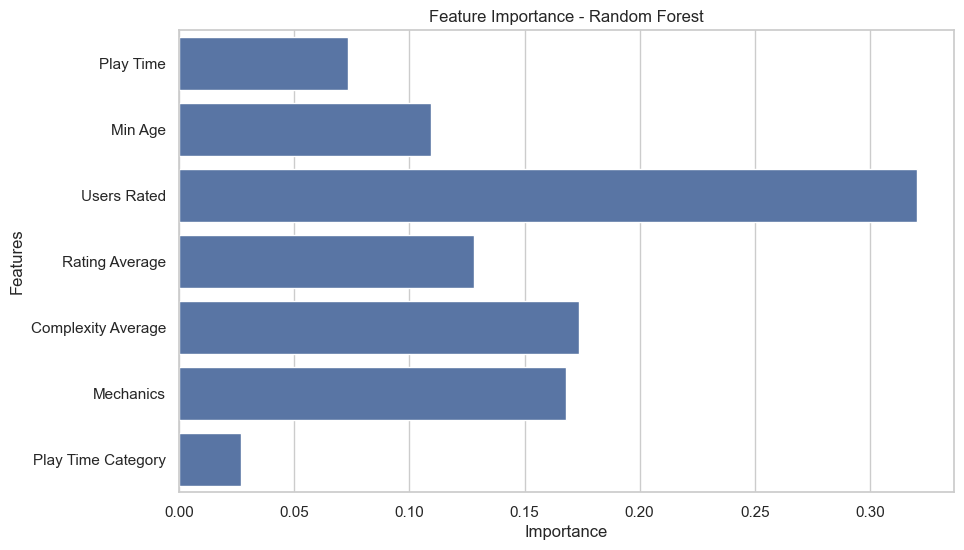

In [93]:
# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Prueba  del Modelo RandomForestClassifier con nuevo Datasets 2018-2021

In [94]:
# Filtrar el DataFrame original por juegos desde el 2018
new_games2 = games_1900[games_1900['Year Published'] >= 2018].copy()

# Mostrar las primeras filas del nuevo DataFrame
print(new_games2.head())

          ID                          Name  Year Published  Min Players  \
2   224517.0             Brass: Birmingham          2018.0            2   
5   291457.0  Gloomhaven: Jaws of the Lion          2020.0            1   
19  266192.0                      Wingspan          2019.0            1   
23  167355.0                       Nemesis          2018.0            1   
26  237182.0                          Root          2018.0            2   

    Max Players  Play Time  Min Age  Users Rated Rating Average  BGG Rank  \
2             4        120       14        19217           8,66         3   
5             4        120       14         8392           8,87         6   
19            5         70       10        43165           8,11        20   
23            5        180       12        12290           8,40        24   
26            4         90       10        24412           8,10        27   

   Complexity Average  Owned Users  \
2                3,91      28785.0   
5         

In [95]:
# Limpiar columnas numéricas
numeric_columns = ['Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'Complexity Average']

for col in numeric_columns:
    # Verificar si la columna es de tipo string antes de aplicar la operación
    if new_games2[col].dtype == 'O':
        new_games2[col] = new_games2[col].str.replace(',', '').astype(float)# Limpiar columnas numéricas
numeric_columns = ['Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'Complexity Average']

for col in numeric_columns:
    # Verificar si la columna es de tipo string antes de aplicar la operación
    if new_games2[col].dtype == 'O':
        new_games2[col] = new_games2[col].str.replace(',', '').astype(float)

In [96]:
# Aplicar LabelEncoder a las columnas categóricas
categorical_columns = ['Mechanics', 'Play Time Category', 'Main_Category']
new_games2[categorical_columns] = new_games2[categorical_columns].apply(lambda col: le.fit_transform(col))

In [97]:
# Feature Selection en el nuevo DataFrame
X_new_games2 = new_games2[features]

# Etiquetas verdaderas del nuevo DataFrame
y_true_new_games2 = new_games2['Main_Category']

# Hacer predicciones con el mejor modelo entrenado
y_pred_new_games2 = best_model.predict(X_new_games2)

# Calcular y mostrar la precisión y el informe de clasificación en el conjunto new_games2
accuracy_new_games2 = accuracy_score(y_true_new_games2, y_pred_new_games2)
print(f'Accuracy on new_games2: {accuracy_new_games2}')
print('Classification Report on new_games2:\n', classification_report(y_true_new_games2, y_pred_new_games2, zero_division=1))


Accuracy on new_games2: 0.8434979025492094
Classification Report on new_games2:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        11
           1       0.20      0.19      0.19       182
           2       0.80      0.07      0.13       232
           3       0.88      0.96      0.92      2674

    accuracy                           0.84      3099
   macro avg       0.72      0.30      0.31      3099
weighted avg       0.84      0.84      0.81      3099



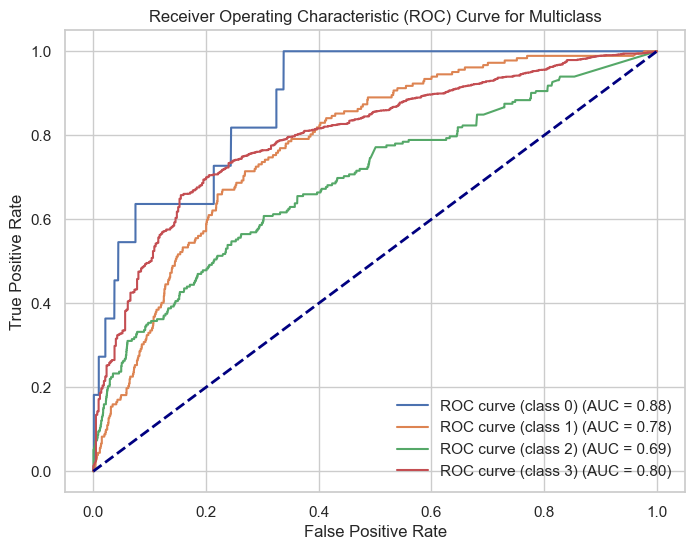

In [ ]:
# Binarizar las etiquetas multiclase
your_class_labels = [0, 1, 2, 3]  # Reemplaza con las etiquetas reales de tus clases
y_true_bin = label_binarize(y_true_new_games2, classes=your_class_labels)

# Obtener las probabilidades predichas para cada clase
y_prob_new_games2 = best_model.predict_proba(X_new_games2)

# Inicializar el clasificador "uno contra todos"
classifier = OneVsRestClassifier(best_model)

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = len(your_class_labels)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob_new_games2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc='lower right')
plt.show()

## KNN (k-Nearest Neighbors)

In [ ]:
# Crear una copia del DataFrame original
games_2017_copy = games_2017.copy()

# Seleccionar las columnas de interés
selected_columns = ['Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'Complexity Average', 'Main_Category']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
df_selected = games_2017_copy[selected_columns].copy()  # Añadir .copy() para asegurarse de tener una copia independiente

# Convertir las columnas 'Rating Average' y 'Complexity Average' a valores numéricos
df_selected.loc[:, 'Rating Average'] = pd.to_numeric(df_selected['Rating Average'].str.replace(',', ''), errors='coerce')
df_selected.loc[:, 'Complexity Average'] = pd.to_numeric(df_selected['Complexity Average'].str.replace(',', ''), errors='coerce')

# Separar las características (X) de la variable objetivo (y)
X = df_selected.drop('Main_Category', axis=1)
y = df_selected['Main_Category']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir preprocesadores para datos numéricos y categóricos (en este caso, solo datos numéricos)
numeric_features = X.columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combinar preprocesadores en un transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Crear el pipeline del modelo KNN
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))  # Puedes ajustar el número de vecinos (n_neighbors) según sea necesario
])

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)



In [ ]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.701938353987925
Classification Report:
                       precision    recall  f1-score   support

               Other       0.33      0.34      0.33       133
Seccion Customizable       0.29      0.22      0.25       422
      Seccion Family       0.62      0.49      0.55       416
    Seccion Strategy       0.79      0.86      0.82      2176

            accuracy                           0.70      3147
           macro avg       0.51      0.48      0.49      3147
        weighted avg       0.68      0.70      0.69      3147



KNN (k-Nearest Neighbors) - SMOTE

In [ ]:
# Crear una copia del DataFrame original
games_2017_copy = games_2017.copy()

# Seleccionar las columnas de interés
selected_columns = ['Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'Complexity Average', 'Main_Category']

# Filtrar el DataFrame para incluir solo las columnas seleccionadas
df_selected = games_2017_copy[selected_columns].copy()

# Convertir las columnas 'Rating Average' y 'Complexity Average' a valores numéricos
df_selected.loc[:, 'Rating Average'] = pd.to_numeric(df_selected['Rating Average'].str.replace(',', ''), errors='coerce')
df_selected.loc[:, 'Complexity Average'] = pd.to_numeric(df_selected['Complexity Average'].str.replace(',', ''), errors='coerce')

# Separar las características (X) de la variable objetivo (y)
X = df_selected.drop('Main_Category', axis=1)
y = df_selected['Main_Category']

In [ ]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Definir preprocesadores para datos numéricos y categóricos (en este caso, solo datos numéricos)
numeric_features = X.columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combinar preprocesadores en un transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])



In [ ]:
# Crear el pipeline del modelo KNN
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))  # Puedes ajustar el número de vecinos (n_neighbors) según sea necesario
])

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Play Time', 'Min Age', 'Users Rated', 'Rating Average',
       'Complexity Average'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7670036764705882
Classification Report:
                       precision    recall  f1-score   support

               Other       0.87      0.95      0.91      2176
Seccion Customizable       0.67      0.73      0.70      2176
      Seccion Family       0.78      0.78      0.78      2176
    Seccion Strategy       0.74      0.61      0.67      2176

            accuracy                           0.77      8704
           macro avg       0.77      0.77      0.76      8704
        weighted avg       0.77      0.77      0.76      8704



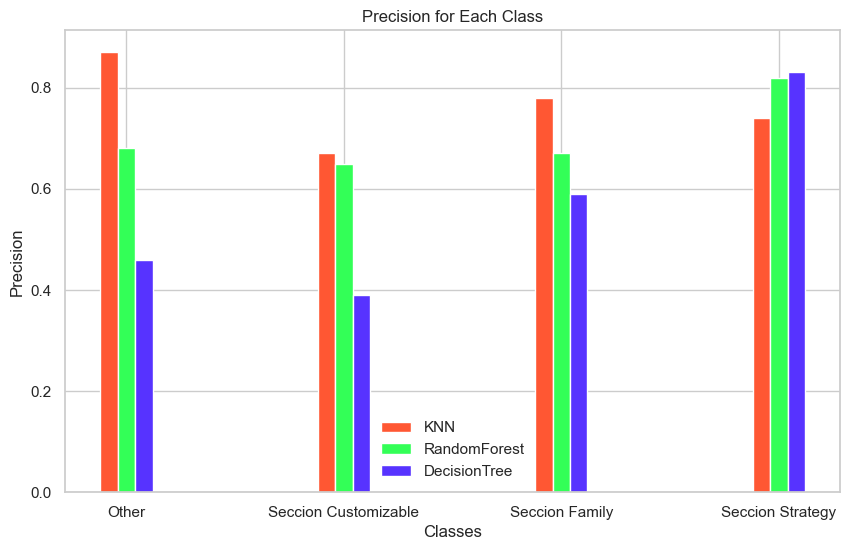

In [ ]:
# Data for KNN
knn_precision = [0.87, 0.67, 0.78, 0.74]
knn_recall = [0.95, 0.73, 0.78, 0.61]
knn_f1_score = [0.91, 0.70, 0.78, 0.67]

# Data for RandomForest
rf_precision = [0.68, 0.65, 0.67, 0.82]
rf_recall = [0.43, 0.24, 0.63, 0.94]
rf_f1_score = [0.53, 0.35, 0.65, 0.88]

# Data for DecisionTreeClassifier
dt_precision = [0.46, 0.39, 0.59, 0.83]
dt_recall = [0.47, 0.35, 0.58, 0.85]
dt_f1_score = [0.46, 0.37, 0.59, 0.84]

# Class labels
classes = ['Other', 'Seccion Customizable', 'Seccion Family', 'Seccion Strategy']

# Bar width
bar_width = 0.08
index = np.arange(len(classes))

# Colors
vidiris_colors = ['#FF5733', '#33FF57', '#5733FF']

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(index - bar_width, knn_precision, bar_width, label='KNN', color=vidiris_colors[0])
ax.bar(index, rf_precision, bar_width, label='RandomForest', color=vidiris_colors[1])
ax.bar(index + bar_width, dt_precision, bar_width, label='DecisionTree', color=vidiris_colors[2])

# Adding labels
ax.set_xlabel('Classes')
ax.set_ylabel('Precision')
ax.set_title('Precision for Each Class')
ax.set_xticks(index)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.show()

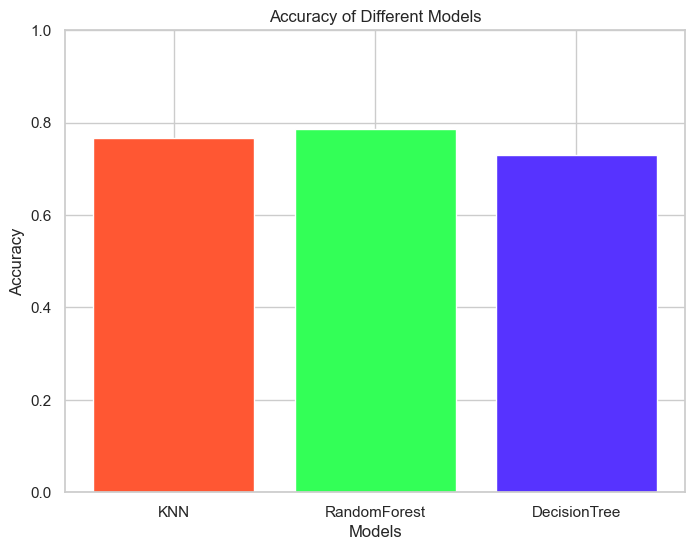

In [ ]:
# Accuracy data
accuracies = [0.7670036764705882, 0.7851922465840483, 0.7299014934858595]
models = ['KNN', 'RandomForest', 'DecisionTree']

# Choose your own colors
colors = ['#FF5733', '#33FF57', '#5733FF']

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=colors)
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to better visualize differences
plt.show()